In [1]:
import numpy as np 
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt


In [2]:
df= pd.read_csv('Credit card transactions - India - Simple.csv')

In [3]:
df.info()
df.isnull().sum()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26052 entries, 0 to 26051
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   index      26052 non-null  int64 
 1   City       26052 non-null  object
 2   Date       26052 non-null  object
 3   Card Type  26052 non-null  object
 4   Exp Type   26052 non-null  object
 5   Gender     26052 non-null  object
 6   Amount     26052 non-null  int64 
dtypes: int64(2), object(5)
memory usage: 1.4+ MB


,index,City,Date,Card Type,Exp Type,Gender,Amount
0,0,"Delhi, India",29-Oct-14,Gold,Bills,F,82475
1,1,"Greater Mumbai, India",22-Aug-14,Platinum,Bills,F,32555
2,2,"Bengaluru, India",27-Aug-14,Silver,Bills,F,101738
3,3,"Greater Mumbai, India",12-Apr-14,Signature,Bills,F,123424
4,4,"Bengaluru, India",5-May-15,Gold,Bills,F,171574


In [4]:
df['City']

0                 Delhi, India
1        Greater Mumbai, India
2             Bengaluru, India
3        Greater Mumbai, India
4             Bengaluru, India
                 ...          
26047           Kolkata, India
26048              Pune, India
26049         Hyderabad, India
26050            Kanpur, India
26051         Hyderabad, India
Name: City, Length: 26052, dtype: object

In [5]:
# Remove ', India' from the 'City' column
df['City'] = df['City'].str.replace(', India', '', regex=False)


In [6]:
df['City']

0                 Delhi
1        Greater Mumbai
2             Bengaluru
3        Greater Mumbai
4             Bengaluru
              ...      
26047           Kolkata
26048              Pune
26049         Hyderabad
26050            Kanpur
26051         Hyderabad
Name: City, Length: 26052, dtype: object

<Axes: xlabel='Gender', ylabel='count'>

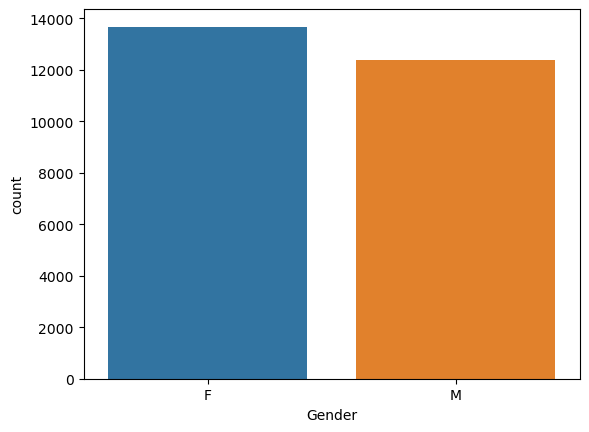

In [7]:
sns.countplot(x='Gender', data=df)

Text(0.5, 1.0, 'Spending Distribution by Card Type')

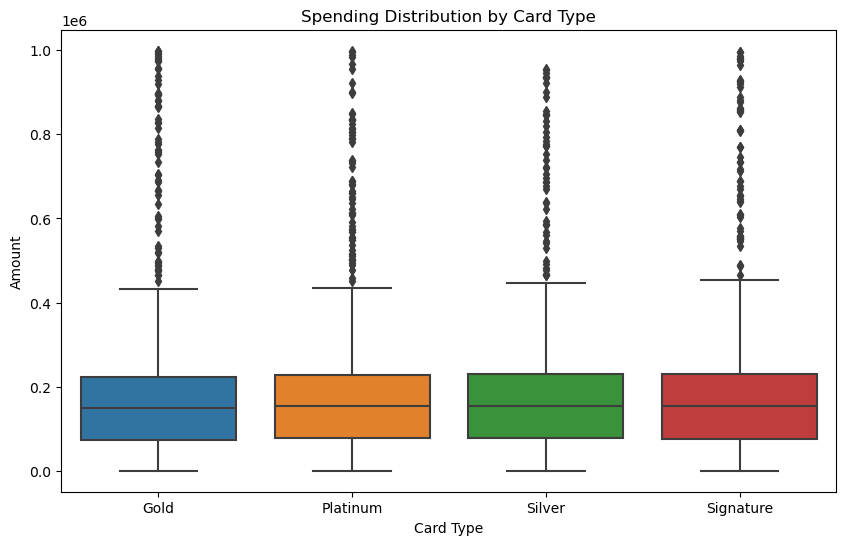

In [8]:
   import seaborn as sns
   plt.figure(figsize=(10, 6))
   sns.boxplot(x='Card Type', y='Amount', data=df)
   plt.title('Spending Distribution by Card Type')
   

<Axes: xlabel='Card Type', ylabel='count'>

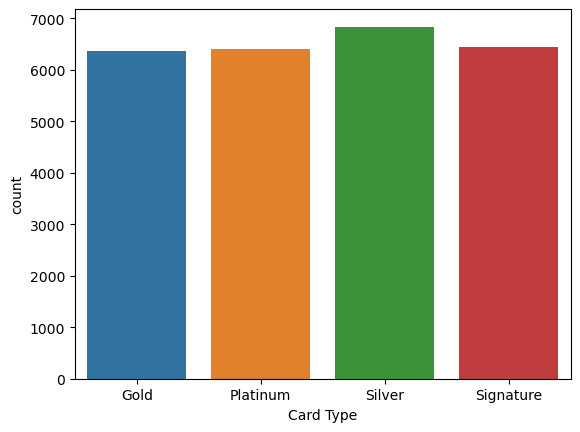

In [9]:
sns.countplot(x='Card Type', data=df)

Text(0, 0.5, '')

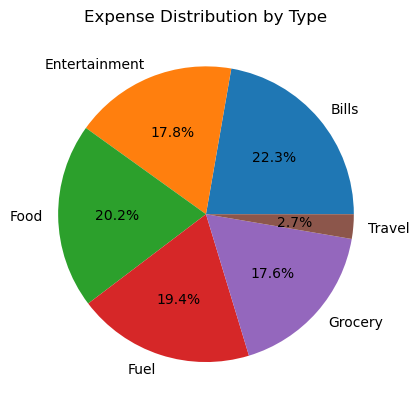

In [10]:
   df.groupby('Exp Type')['Amount'].sum().plot(kind='pie', autopct='%1.1f%%')
   plt.title('Expense Distribution by Type')
   plt.ylabel('')
   

Text(0, 0.5, 'Amount')

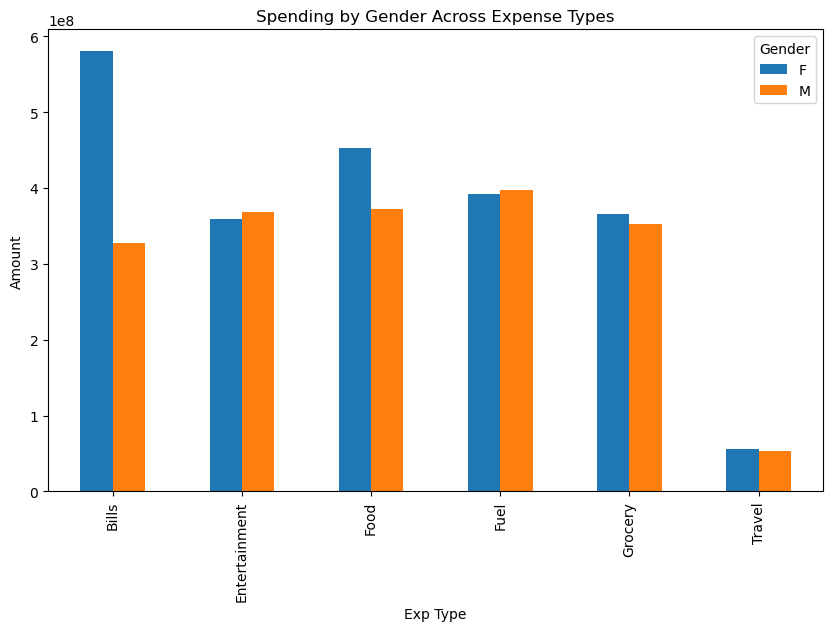

In [11]:
   pivot = df.pivot_table(index='Exp Type', columns='Gender', values='Amount', aggfunc='sum')
   pivot.plot(kind='bar', figsize=(10, 6))
   plt.title('Spending by Gender Across Expense Types')
   plt.ylabel('Amount')
   

/tmp/ipykernel_1166/3496381219.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Date'] = pd.to_datetime(df['Date'])


Text(0, 0.5, 'Amount')

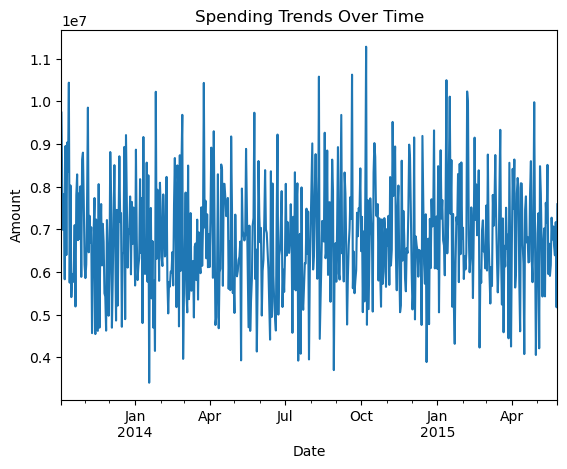

In [12]:
   # Convert Date to datetime
   df['Date'] = pd.to_datetime(df['Date'])
   df.groupby('Date')['Amount'].sum().plot()
   plt.title('Spending Trends Over Time')
   plt.ylabel('Amount')
   

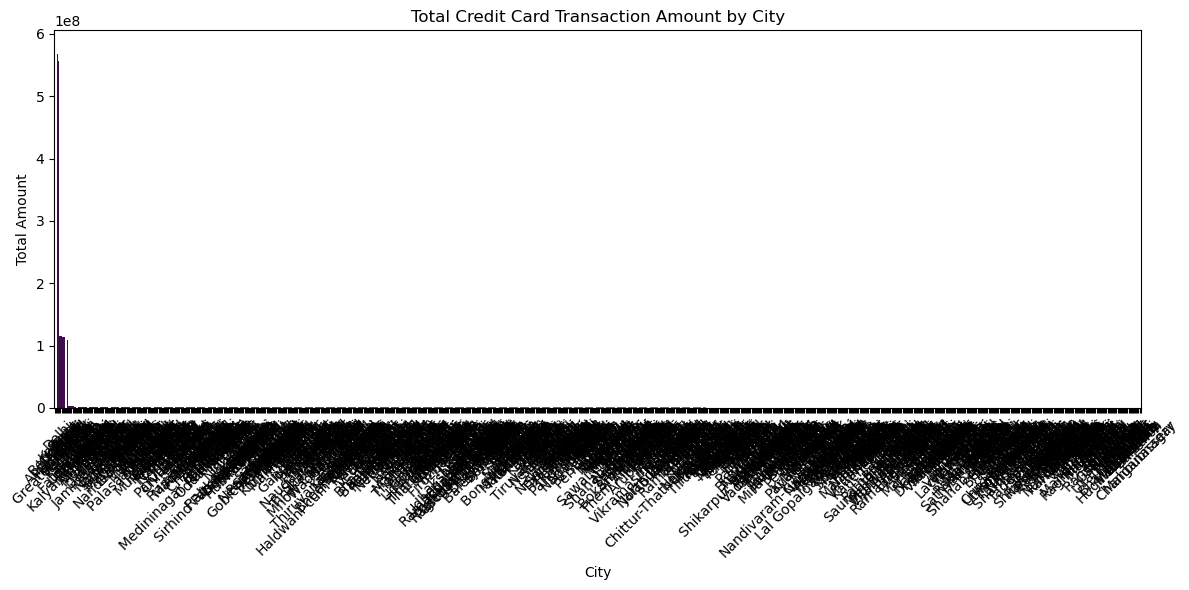

In [15]:
# Group by city and sum the Amount
city_data = df.groupby('City')['Amount'].sum().sort_values(ascending=False).reset_index()

# Plot
plt.figure(figsize=(12,6))
sns.barplot(data=city_data, x='City', y='Amount', palette='viridis')
plt.xticks(rotation=45)
plt.title('Total Credit Card Transaction Amount by City')
plt.xlabel('City')
plt.ylabel('Total Amount')
plt.tight_layout()
plt.show()


In [16]:
pip install sweetviz

Defaulting to user installation because normal site-packages is not writeable
Looking in links: /usr/share/pip-wheels
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.1/15.1 MB 62.8 MB/s eta 0:00:00 0:00:0136m0:00:01
Note: you may need to restart the kernel to use updated packages.


                                             |          | [  0%]   00:00 -> (? left)


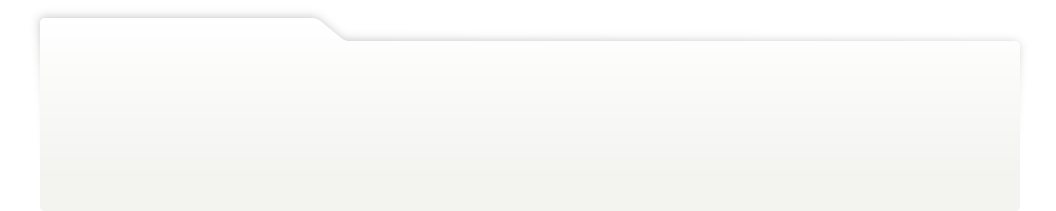
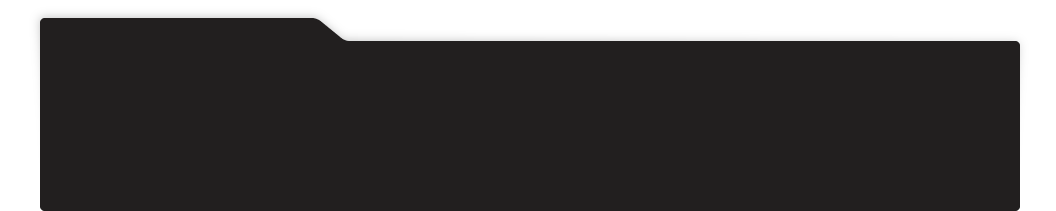
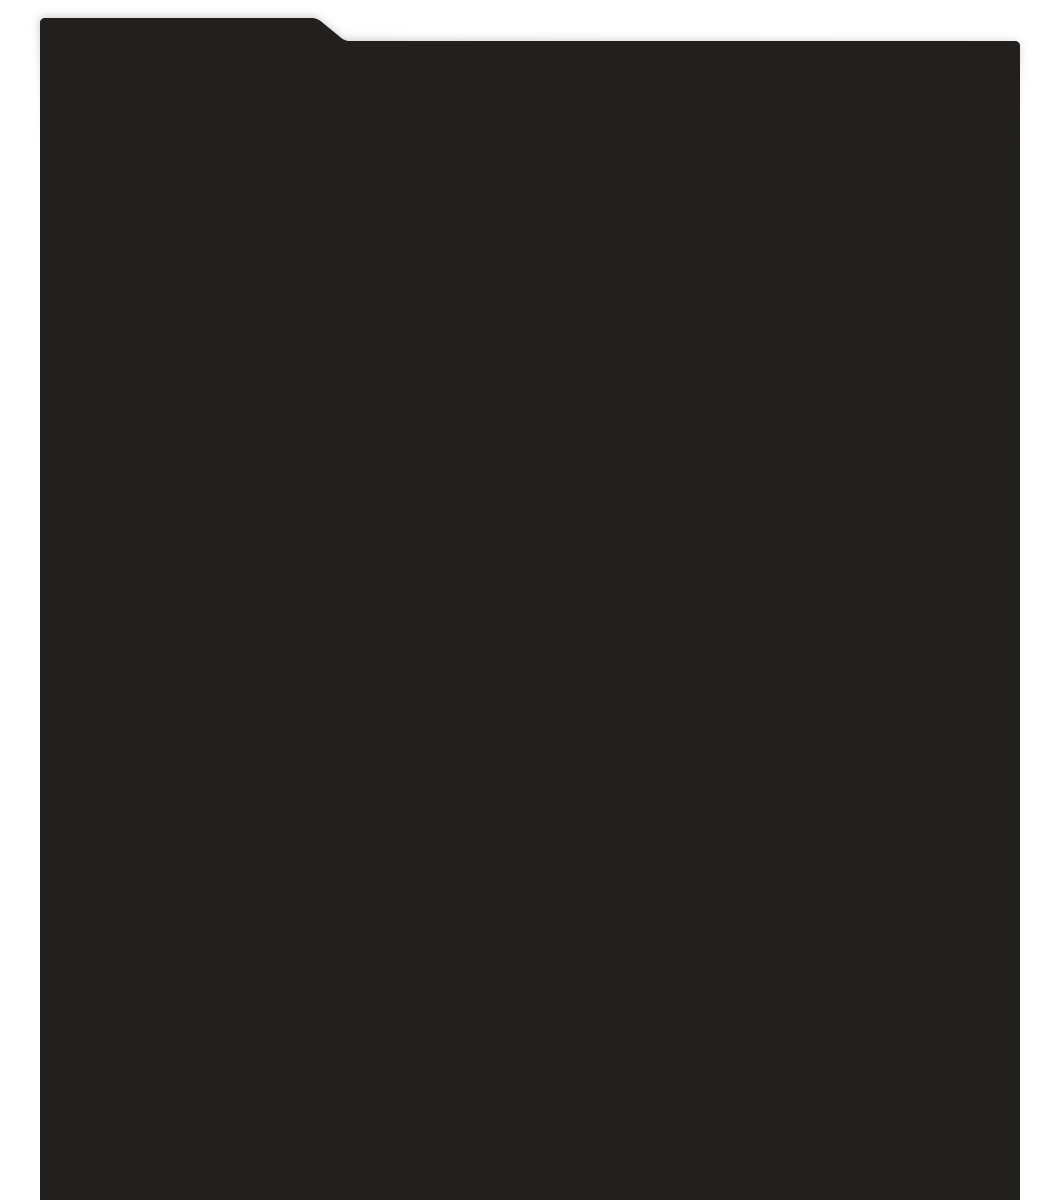
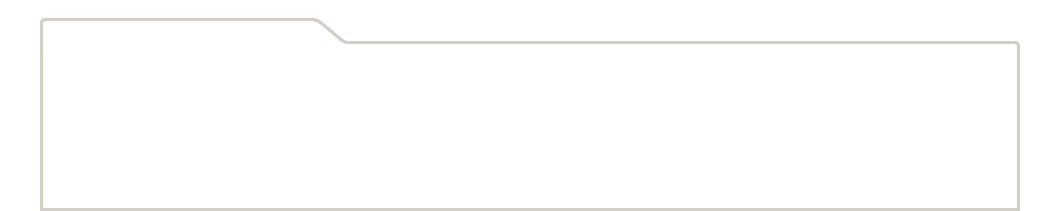
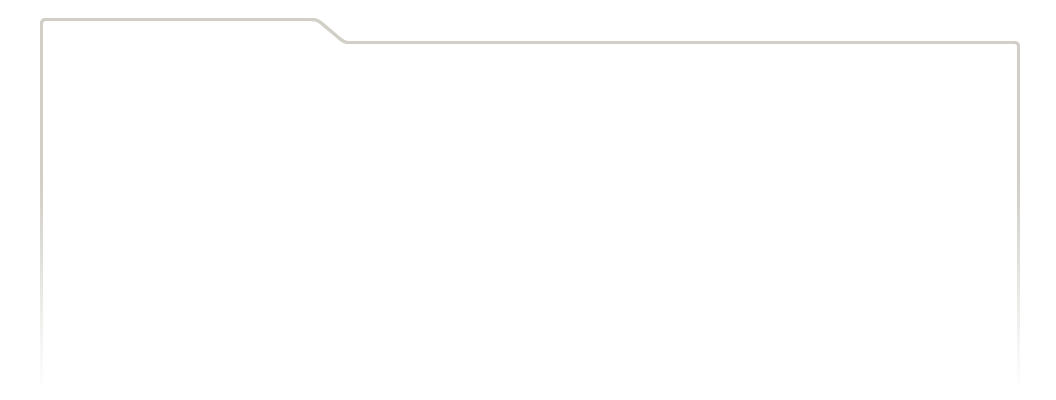
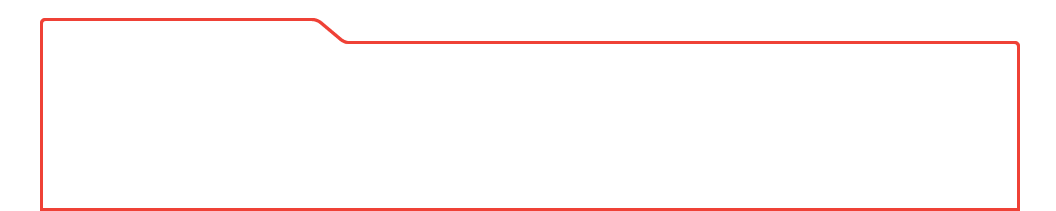
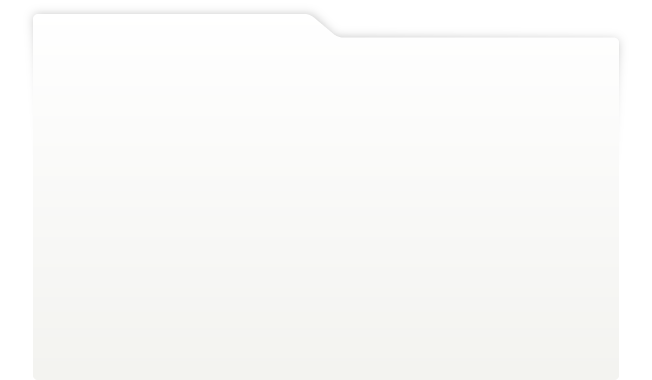
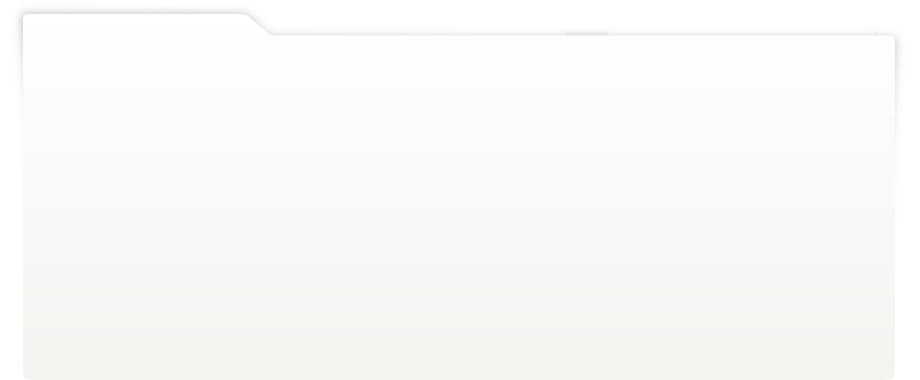
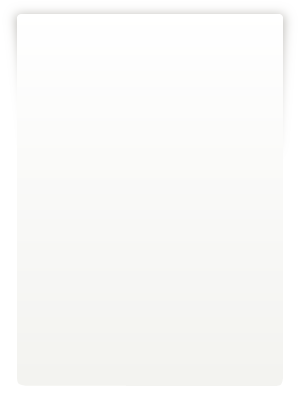
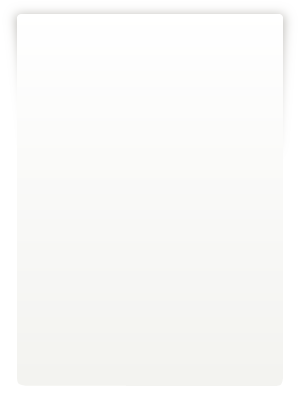
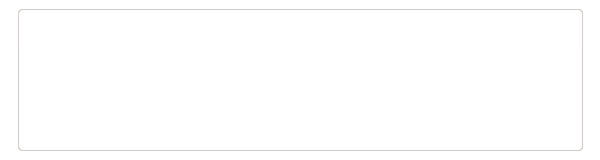
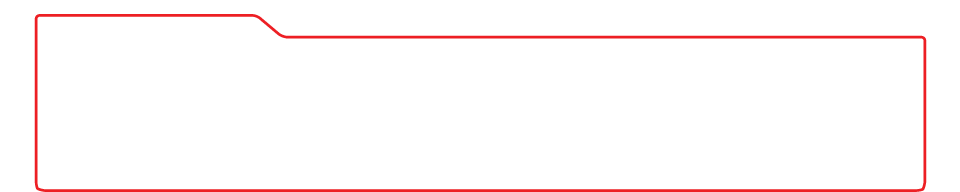
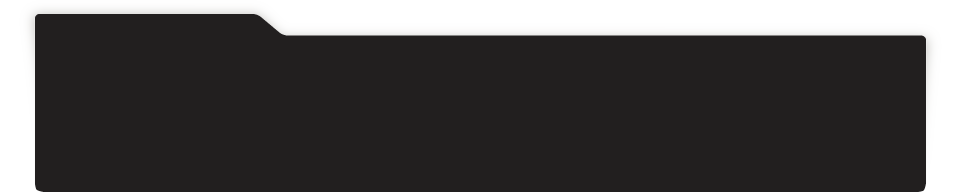
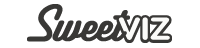
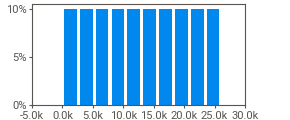
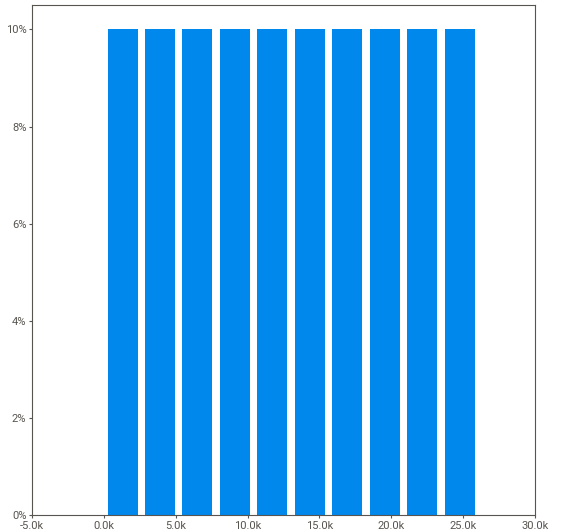
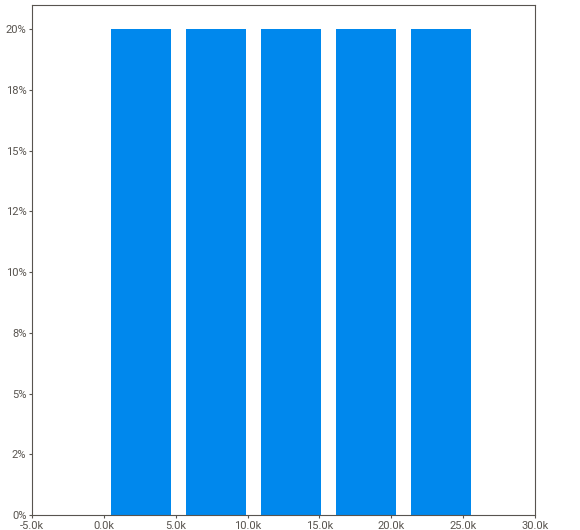
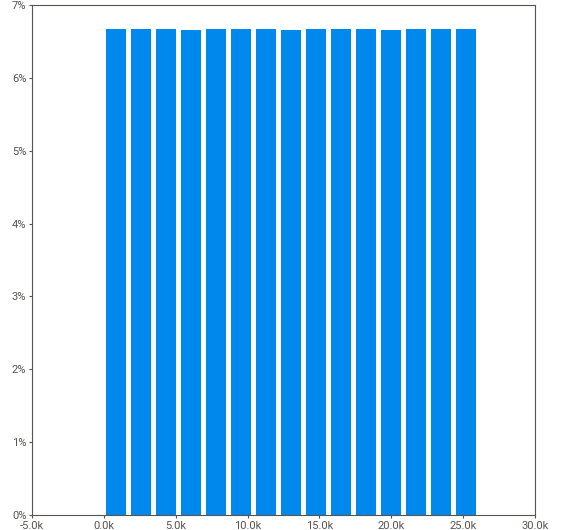
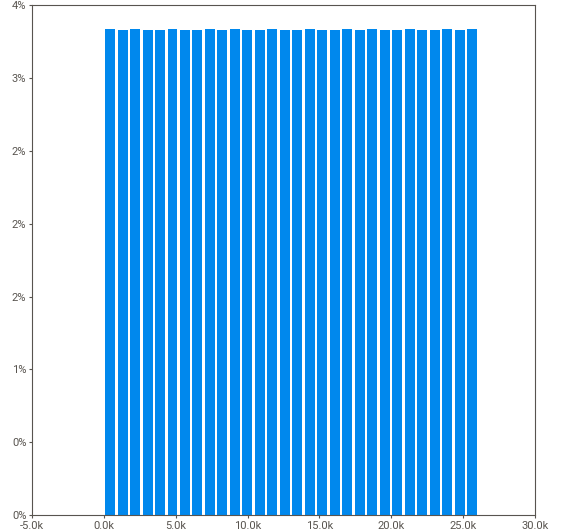
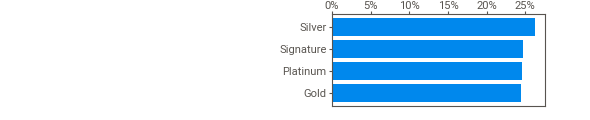
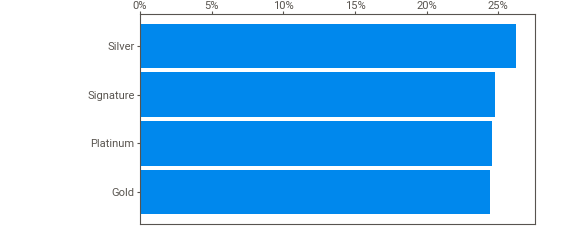
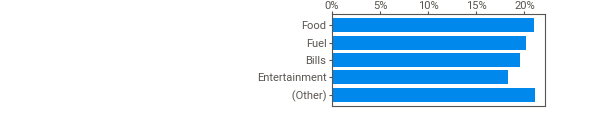
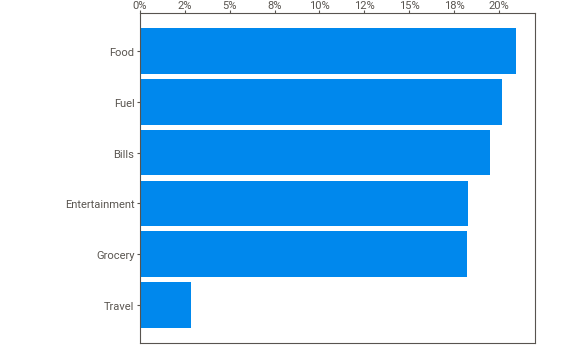
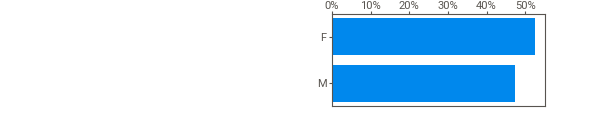
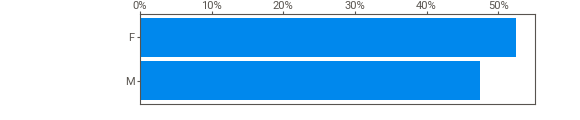
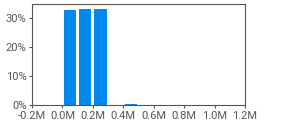
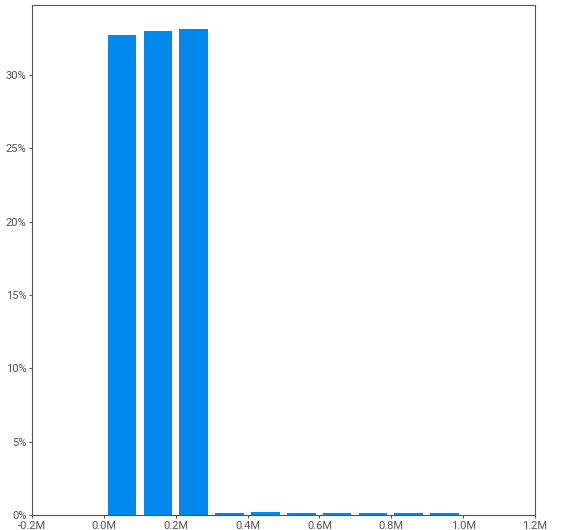
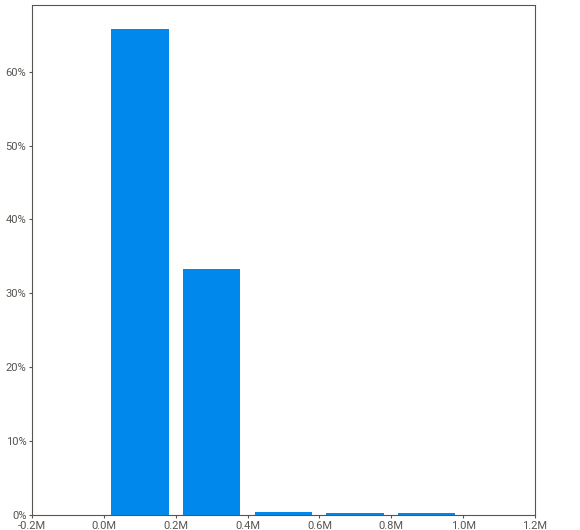
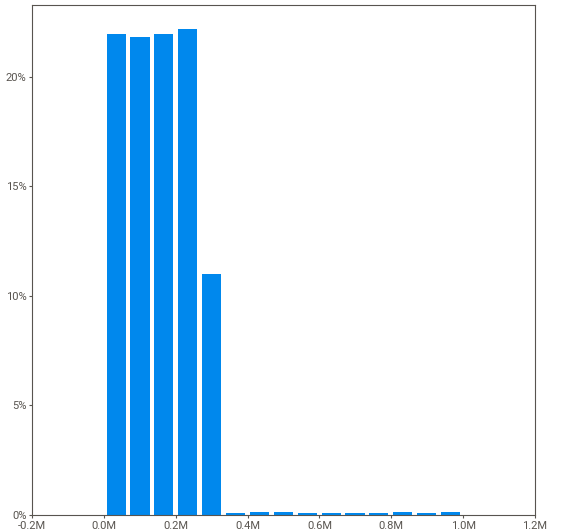
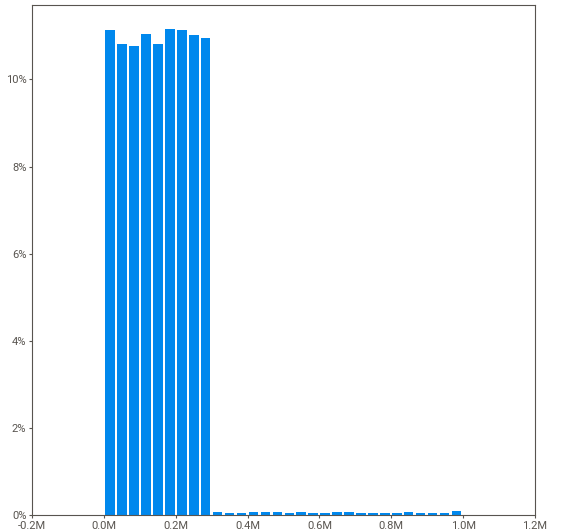
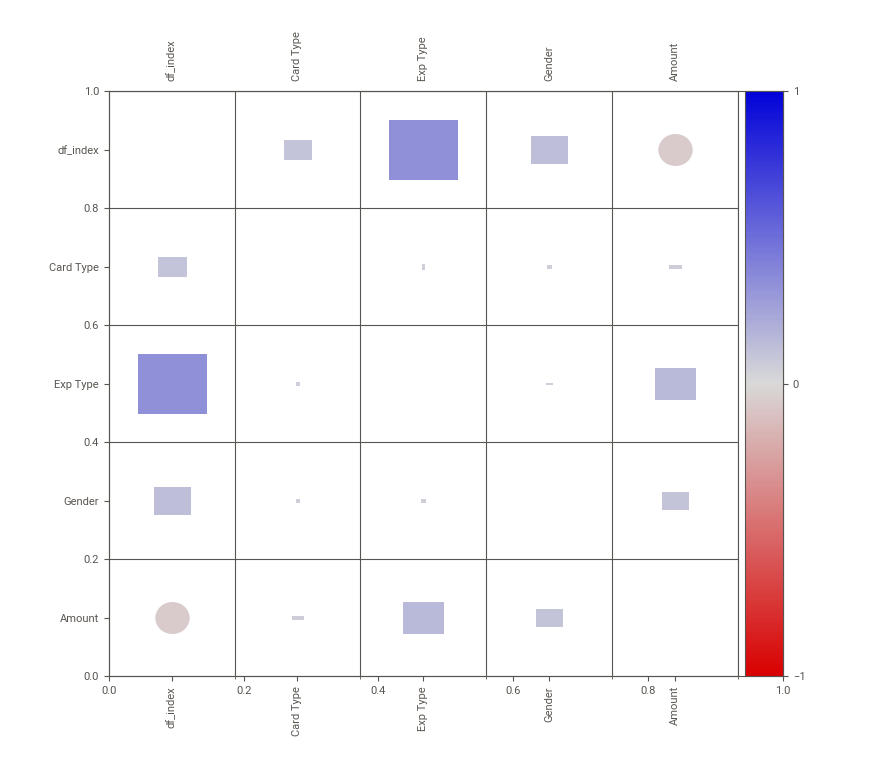
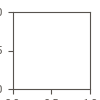

In [17]:
import sweetviz as sv

report = sv.analyze(df).show_notebook()